In [21]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, interp2d
from scipy import linalg
import matplotlib.pyplot as plt
import random
from IPython.display import display, clear_output
from ipywidgets import widgets, Layout, interact, interactive, fixed, interact_manual
from jupyterthemes import jtplot
import time
import scipy as scipy
import csv
# import cufflinks as cf 
# import plotly.offline as py

# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)


In [27]:
# Input the initial variables:
style = {'description_width' : 'initial'}
erosion_type = widgets.Dropdown(options = [('Stochastic Rockfalls', 'stochastic'),
                                           ('Steady-state', 'constant'),
                                           ('No Erosion', 'none')],
                                value='stochastic',
                                description='Erosion type:',
                                style = style)

print('Select an erosion type for the simulation.')
display(erosion_type)

total_time = widgets.BoundedIntText(value = 75,
                                   min = 10,
                                   max = 150000,
                                   description = "Total time:")

print('Input total time length (years) for individual simulations. \nMax = 150000 \nMin = 10')
display(total_time)

SLHL_C14 = widgets.Dropdown(options=[('9.5 \t (Fenton et al. (2019)', 9.5),
                                      ('12.76 \t (Borchers et al. (2016)', 12.76)],
                           value = 12.76,
                           description='$^{14}$C Production Rate:',
                           style = style)
print('Select a C-14 sea level high latitude production rate. \nBorchers et al. (2016) (12.76) is recommended.')
display(SLHL_C14)

SLHL_Be10 = widgets.Dropdown(options=[('3.83 \t (Borchers et al. (2016)', 3.83),
                                      ('3.89 \t (Borchers et al. (2016)', 3.89),
                                      ('3.93 \t (Borchers et al. (2016)', 3.93),
                                      ('4.02 \t (Borchers et al. (2016))', 4.02)],
                           value=3.89,
                           description='$^{10}$Be Production Rate:',
                           style = style)
print('Select a Be-10 sea level high latitude production rate.')
display(SLHL_Be10)

SLHL_He3 = widgets.Dropdown(options=[('102 \t ( Vermeesh et al. (2009)', 102.0),
                                      ('107 \t (Vermeesh et al. (2009)', 107.0),
                                      ('110 \t (Vermeesh et al. (2009)', 110.0),
                                     ('112.26 \t (Borchers et al. (2016)', 112.26),
                                      ('114.55 \t (Borchers et al. (2016)', 114.55),
                                     ('117.47 \t (Borchers et al. (2016)', 117.47),
                                     ('128 \t (Vermeesh et al. (2009))', 128.0)],
                           value=114.55,
                           description='$^{3}$He Production Rate:',
                           style = style)
print('Select a He-3 sea level high latitude production rate.')
display(SLHL_He3)

scaling_factor = widgets.BoundedFloatText(value = 1.0,
                                min = 0.0000001,
                                max = 900.0,
                                step = 0.1, 
                                description = "CN scaling factor: \t",
                                style = style)
print('Input cosmogenic nuclide production rate scaling factor. \nFor SLHL, enter ' + str('1') + '.')
display(scaling_factor)

gr_sz = widgets.BoundedFloatText(value = 0.1,
                                min = 0.08,
                                max = 2.0,
                                step = 0.01, 
                                description = "Quartz grain size",
                                style = style)
print('Input the mean grain size of the quartz used for He-3 measurements.')
display(gr_sz)

MAT = widgets.BoundedFloatText(value = 0.0,
                                min = -50.0,
                                max = 15.0,
                                step = 0.5, 
                                description = "Mean annual temperature (0 $\circ$C)",
                                style = style)
print('Input a mean annual temperature for the simulations.')
display(MAT)

T_AMP=widgets.BoundedFloatText(value=5.0,
                                min=0.5,
                                max=35.0,
                                step=0.5, 
                                description = "Temperature seasonality",
                                style = style)
print('Input an amplitude for the seasonal temperature function. \nAmplitude of 5.0 for MAT = 0.0 indicates mean summer temperature of +5.0 C and mean winter temperature of -5.0 C.')
display(T_AMP)

save_output = widgets.Dropdown(options = [('Yes', True), ('No',False)],
                              value = True,
                              description = 'Save Output')
print('Would you like to export the generated data files?')
display(save_output)

rows = ['$^{14}$C conc', '$^{10}$Be Conc', '$^{14}$C/$^{14}$Be','$^{3}$He Conc.', '$^{3}$He Percent', '$^{10}$Be Erosion Rate']

save_only_surf = True

Select an erosion type for the simulation.


Dropdown(description='Erosion type:', options=(('Stochastic Rockfalls', 'stochastic'), ('Steady-state', 'const…

Input total time length (years) for individual simulations. 
Max = 150000 
Min = 10


BoundedIntText(value=75, description='Total time:', max=150000, min=10)

Select a C-14 sea level high latitude production rate. 
Borchers et al. (2016) (12.76) is recommended.


Dropdown(description='$^{14}$C Production Rate:', index=1, options=(('9.5 \t (Fenton et al. (2019)', 9.5), ('1…

Select a Be-10 sea level high latitude production rate.


Dropdown(description='$^{10}$Be Production Rate:', index=1, options=(('3.83 \t (Borchers et al. (2016)', 3.83)…

Select a He-3 sea level high latitude production rate.


Dropdown(description='$^{3}$He Production Rate:', index=4, options=(('102 \t ( Vermeesh et al. (2009)', 102.0)…

Input cosmogenic nuclide production rate scaling factor. 
For SLHL, enter 1.


BoundedFloatText(value=1.0, description='CN scaling factor: \t', max=900.0, min=1e-07, step=0.1, style=Descrip…

Input the mean grain size of the quartz used for He-3 measurements.


BoundedFloatText(value=0.1, description='Quartz grain size', max=2.0, min=0.08, step=0.01, style=DescriptionSt…

Input a mean annual temperature for the simulations.


BoundedFloatText(value=0.0, description='Mean annual temperature (0 $\\circ$C)', max=15.0, min=-50.0, step=0.5…

Input an amplitude for the seasonal temperature function. 
Amplitude of 5.0 for MAT = 0.0 indicates mean summer temperature of +5.0 C and mean winter temperature of -5.0 C.


BoundedFloatText(value=5.0, description='Temperature seasonality', max=35.0, min=0.5, step=0.5, style=Descript…

Would you like to export the generated data files?


Dropdown(description='Save Output', options=(('Yes', True), ('No', False)), value=True)

In [28]:
# Input the case-dependent variables:
if erosion_type.value == 'stochastic':
    scenarios = widgets.BoundedIntText(value = 10,
                                   min = 1,
                                   max = 30,
                                   description = 'Scenarios:',
                                   style = style)
    print('Input number of stochastic erosion scenarios. \nMax = 30 \nMin = 1')
    display(scenarios)
    
    stoch_base_ER = widgets.BoundedFloatText(value = 0.1,
                                   min = 0.00001,
                                   max = 349.0,
                                   description = 'Base Erosion Rate (cm yr$^{-1}$:',
                                   style = style)
    print('Input the time-averaged erosion rate (total lost / total time).')
    display(stoch_base_ER)
    
    sample_no = widgets.BoundedIntText(value = 30,
                                      min = 2,
                                      max = (total_time.value - 1),
                                      description = 'No. of Sub-samples:',
                                      style = style)
    print('Input the number of sub-samples you would like to base the CN measurements on for each stochastic sample. These concentrations are selected from random times in the model run, as in a "time for space" substition.') 
    display(sample_no)
    

if erosion_type.value == 'constant':
    erosion_rate = widgets.FloatText(value = 0.1,
                                     min = 0.001,
                                     max = 350,
                                     description = 'Erosion Rate (cm yr$^{-1}$)',
                                    style = style)
    print('Input the steady-state erosion rate.')
    display(erosion_rate)

    shift_ER = widgets.Dropdown(options = [('Yes', True), ('No', False)],
                               value = False,
                               description = 'Change erosion rate mid-simulation?',
                               style = style)

    print('Would you like to change the erosion rate during the simulation? This will be a step-function change at a specific time.')  
    display(shift_ER)

    time_ER_shift = widgets.BoundedIntText(value = int(0.5 * total_time.value),
                                          min = 0,
                                          max = (total_time.value - 1),
                                          description = 'Time for rate change:',
                                          style = style)
    new_ER = widgets.BoundedFloatText(value = 0.1,
                                      min = 0.0000001,
                                      max = 349,
                                      description = 'New erosion rate (cm yr$^{-1}$)',
                                     style = style)
    print('If you will change the erosion rate, please input the year of the time change and the new erosion rate.')
    display(time_ER_shift)
    display(new_ER)

Input number of stochastic erosion scenarios. 
Max = 30 
Min = 1


BoundedIntText(value=10, description='Scenarios:', max=30, min=1, style=DescriptionStyle(description_width='in…

Input the time-averaged erosion rate (total lost / total time).


BoundedFloatText(value=0.1, description='Base Erosion Rate (cm yr$^{-1}$:', max=349.0, min=1e-05, style=Descri…

Input the number of sub-samples you would like to base the CN measurements on for each stochastic sample. These concentrations are selected from random times in the model run, as in a "time for space" substition.


BoundedIntText(value=30, description='No. of Sub-samples:', max=74, min=2, style=DescriptionStyle(description_…

In [63]:
%run master_script_functions.ipynb

In [30]:
if get_values(erosion_type) == 'stochastic':
    [erosion_type, 
     total_time, 
     SLHL_C14, 
     SLHL_Be10,
     SLHL_He3, 
     scaling_factor, 
     gr_sz, MAT, T_AMP, 
     save_output,
     scenarios,
     stoch_base_ER, sample_no,
     max_depth, 
     rock_rho, 
     CN_lambda, 
     mu, dt, rho, 
     nx, r, dx, x, 
     x_up, x_low, 
     x_vol, shell_mass, 
     alpha, P0_Be10, P0_He3] = [set_values()[i] for i in range(len(set_values()))]
    
    
    %run rockfall_generation_stochastic_erosion.ipynb
    
    rockfall_matrix_gen(stoch_base_ER)
    rockfall_output = erosion_export(stoch_base_ER)
    
    %run C14_Be10_stochastic_erosion.ipynb
    
    rockfalls_imported = rockfalls_import()
    CRN_output = CRN_loop_fxn(total_time)
    
    %run He3_stochastic_erosion.ipynb
    
    He3_output = He3_loop_fxn(total_time)
    
    %run stochastic_measured_constants_CRN_loops.ipynb
    
    comparison_constants, samples, measured, measured_ER = compare_fxn()
    # og_ER_mat = original_ER_fxn(ERs_all)
    master_array, master_df, master_means = post_process(CRN_output, He3_output)
    
    print('Completed Erosion Rate: ' + str(stoch_base_ER))

elif get_values(erosion_type) == 'constant':
     
    [erosion_type, 
     total_time, 
     SLHL_C14, 
     SLHL_Be10,
     SLHL_He3, 
     scaling_factor, 
     gr_sz, MAT, T_AMP, 
     save_output, initial_ER, 
     shift_ER, time_ER_shift,
     ER_shift_factor,
     max_depth, 
     rock_rho, 
     CN_lambda, 
     mu, dt, rho, 
     nx, r, dx, x, 
     x_up, x_low, 
     x_vol, shell_mass, 
     alpha, P0_Be10, P0_He3] = [set_values()[i] for i in range(len(set_values()))]    
    
    %run D:\STEIN_paper\model_outputs\scripts\C14_Be10_constant_erosion.ipynb
    CRN_output = CRN_loop_fxn(total_time, time_ER_shift)
    
    %run D:\STEIN_paper\model_outputs\scripts\He3_constant_erosion.ipynb
    He3_output = He3_loop_fxn(total_time, time_ER_shift)
    
    He3_percents = np.divide(He3_output[1],CRN_output[4]) * P0_Be10 / P0_He3

Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main C14 & Be10 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.
Main He3 loop scenario 74complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.


C:\Users\dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning:

invalid value encountered in true_divide



Comparison Be10 / C14 loop complete.
Comparison He3 loop scenario complete.
Completed Erosion Rate: 0.1


C:\Users\dennis\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning:

Mean of empty slice.

C:\Users\dennis\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



Using matplotlib backend: nbAgg


Traceback (most recent call last):
  File "C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\backends\backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\_pylab_helpers.py", line 54, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list


<IPython.core.display.Javascript object>


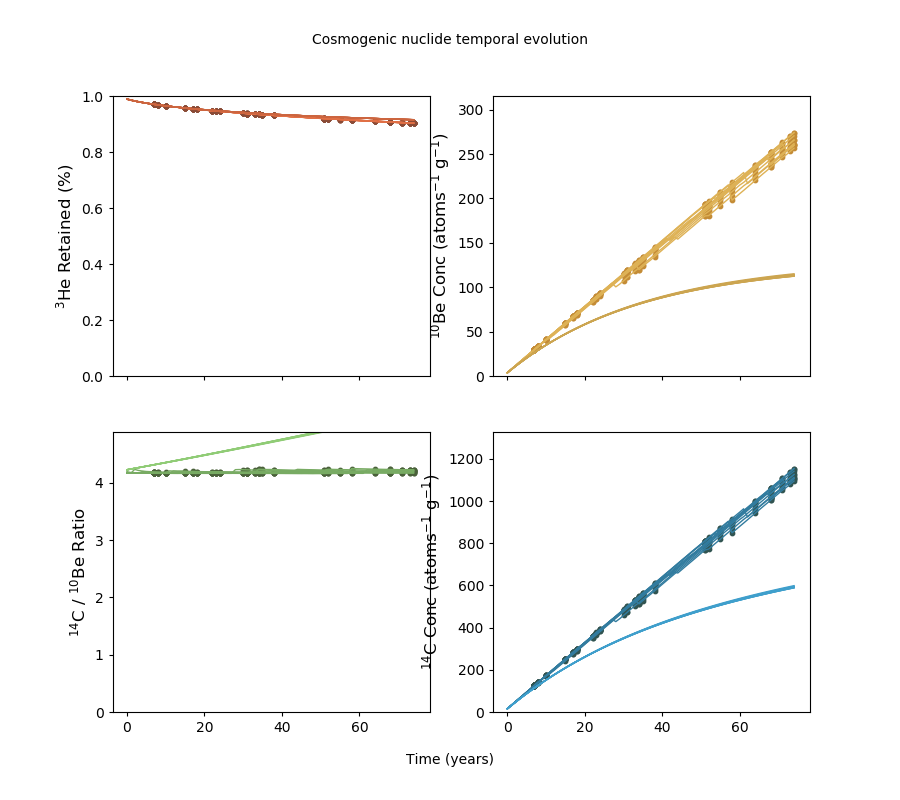

,0,1,2,3,4,5,6,7,8,9
$^{14}$C conc,5.880806e+02,5.773287e+02,5.736417e+02,5.803643e+02,5.727974e+02,5.836027e+02,576.265382,581.221730,573.442599,580.932876
$^{10}$Be Conc,1.397273e+02,1.365084e+02,1.354172e+02,1.374181e+02,1.351641e+02,1.383851e+02,136.204867,137.674290,135.354730,137.591809
$^{14}$C/$^{14}$Be,4.208776e+00,4.229255e+00,4.236106e+00,4.223348e+00,4.237792e+00,4.217237e+00,4.230872,4.221716,4.236591,4.222147
$^{3}$He Conc.,3.796754e+03,3.711360e+03,3.681634e+03,3.735520e+03,3.676211e+03,3.761038e+03,3703.328654,3742.181780,3680.595207,3740.144049
$^{3}$He Percent,3.319577e-177,7.645487e-177,7.646792e-177,7.647154e-177,7.646654e-177,7.646670e-177,0.287136,0.251102,0.223557,0.201031
$^{10}$Be Erosion Rate,1.700150e+00,1.740239e+00,1.754262e+00,1.728719e+00,1.757547e+00,1.716639e+00,1.744117,1.725502,1.755072,1.726536


In [64]:
# plotting
%matplotlib auto

run = np.arange(0,10,1)
run_plot(samples, master_array, run, False)
plt.show()
pd.DataFrame(measured, index = rows)